<a href="https://colab.research.google.com/github/Anpr1211/R-and-Python-Gigs/blob/master/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import libraries

import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [0]:
#read csv from url

df1 = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [0]:
len(df1)

1599

In [0]:
df2 = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [0]:
len(df2)

4898

In [0]:
# merge csv 

df = df1.append(df2)

In [0]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [0]:
len(df)

6497

In [0]:
df = df.drop('quality', axis=1)

# EDA

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
dtypes: float64(11)
memory usage: 769.1 KB


In [0]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


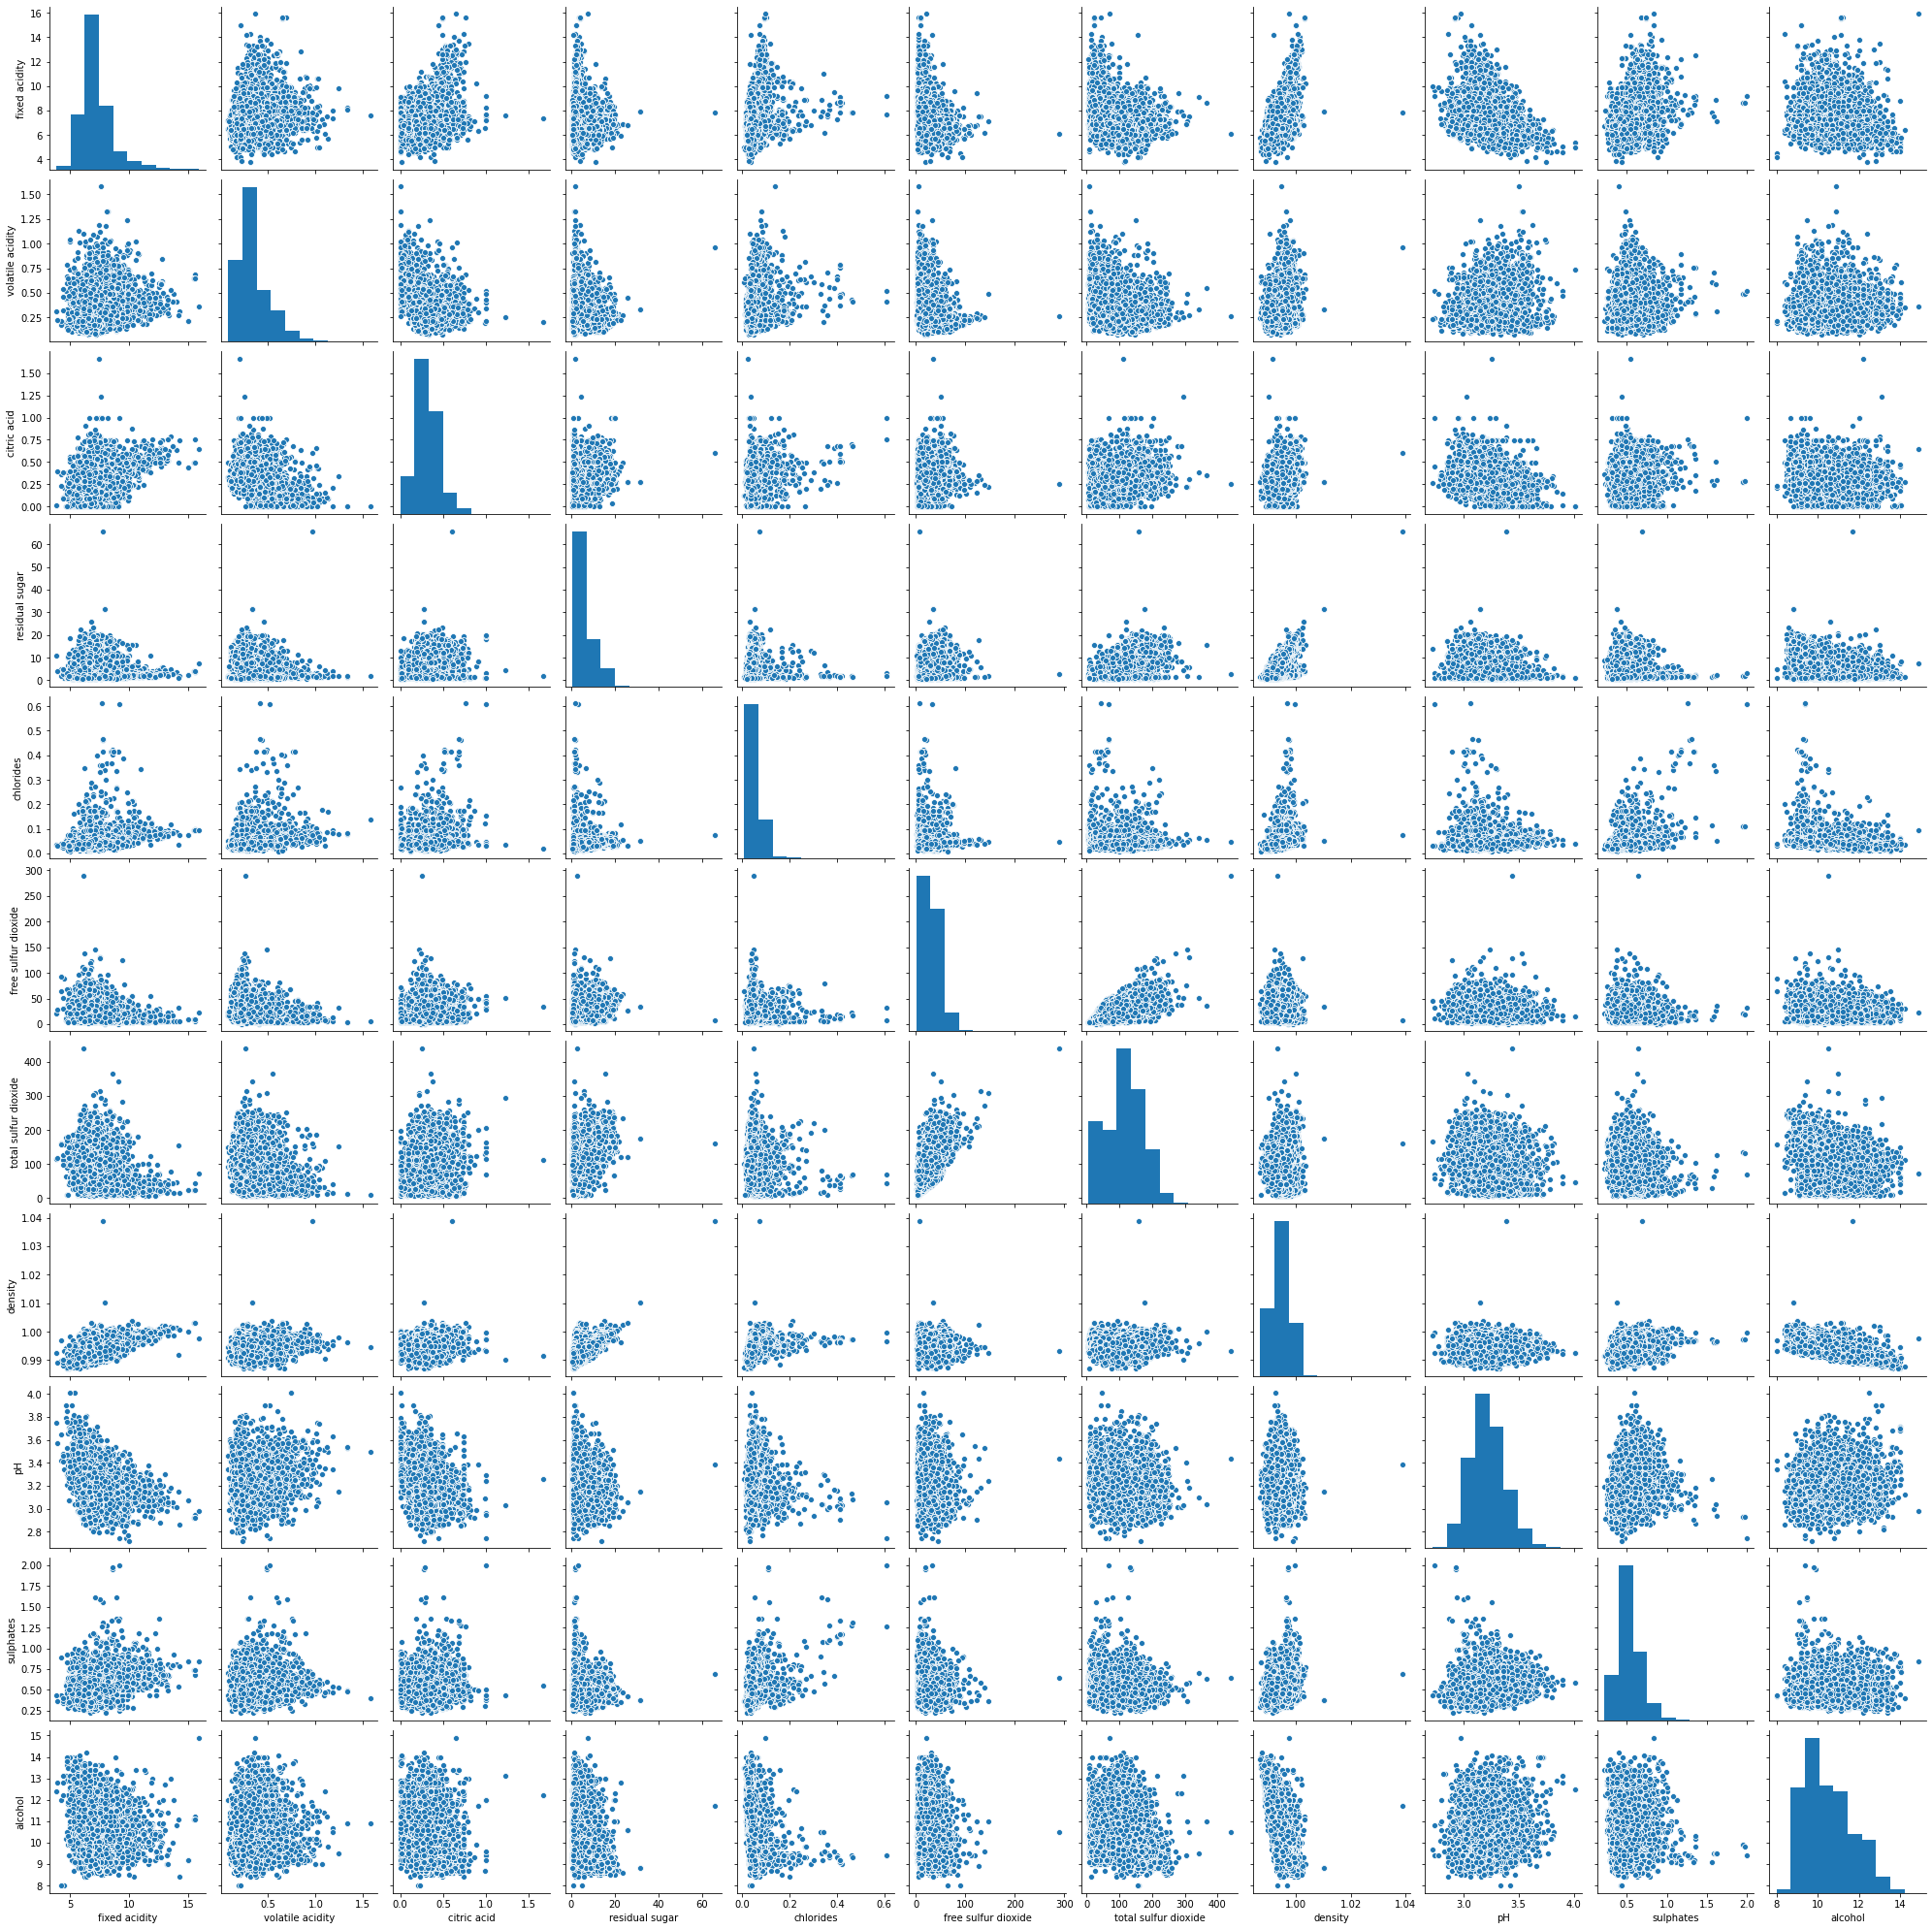

In [0]:
sns.pairplot(df)

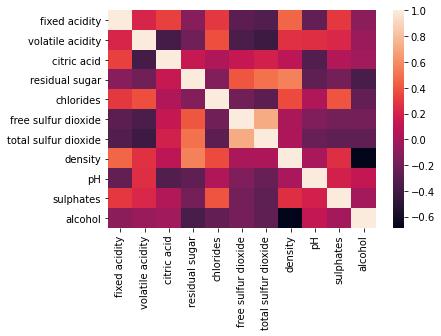

In [0]:
sns.heatmap(df.corr())

In [0]:
df_ = df[['density', 'residual sugar']].copy()

# K Means

The algorithm will categorize the items into k groups of similarity. To calculate that similarity, we will use the euclidean distance as measurement.

In [0]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_)

In [0]:
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

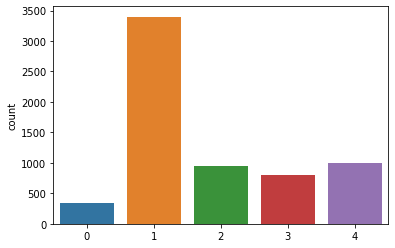

In [0]:
sns.countplot(kmeans.labels_)

In [0]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=["x1", "x2"])

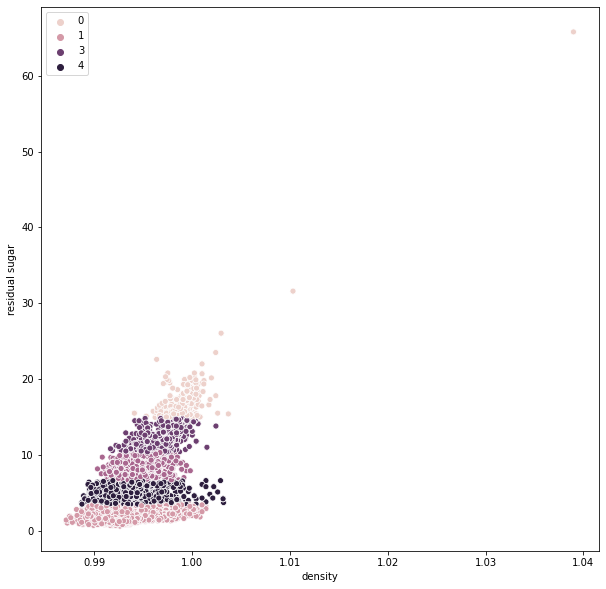

In [0]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=df_.density, y=df_['residual sugar'], hue=kmeans.labels_)

Kmeans with all variables.

In [0]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(df)

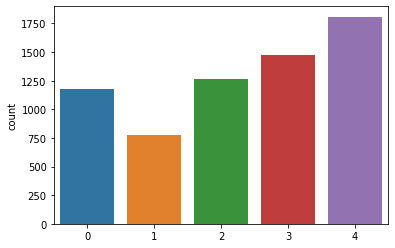

In [0]:
sns.countplot(kmeans.labels_)

In [0]:
kmeans.cluster_centers_

array([[8.37359455e+00, 5.05762351e-01, 2.71005111e-01, 2.46524702e+00,
        8.23867121e-02, 1.14595400e+01, 2.92768313e+01, 9.96395545e-01,
        3.30354344e+00, 6.41405451e-01, 1.05840006e+01],
       [6.98608247e+00, 2.96224227e-01, 3.58002577e-01, 9.66572165e+00,
        5.23144330e-02, 5.28240979e+01, 2.06463918e+02, 9.96521785e-01,
        3.17657216e+00, 5.17757732e-01, 9.62600945e+00],
       [7.15856354e+00, 3.54826361e-01, 3.02138911e-01, 3.34329124e+00,
        5.61365430e-02, 2.23046567e+01, 8.24301500e+01, 9.93383907e-01,
        3.22172060e+00, 5.30102605e-01, 1.09428703e+01],
       [6.92133152e+00, 2.82075408e-01, 3.44232337e-01, 7.70862772e+00,
        4.96379076e-02, 4.19673913e+01, 1.59568614e+02, 9.95131073e-01,
        3.19409647e+00, 4.95842391e-01, 1.01203442e+01],
       [6.84068031e+00, 2.86722898e-01, 3.23379425e-01, 5.19184181e+00,
        4.56537611e-02, 2.97798673e+01, 1.20620299e+02, 9.93376330e-01,
        3.19888827e+00, 4.95210177e-01, 1.07898599e+